In [4]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit.models import VoigtModel
import copy

In [5]:
data5000 = np.loadtxt('Pentacene_air_snr5000.txt')

peakmins = np.zeros(5)
peakmaxs = np.zeros(5)
peakcens = np.zeros(5)

peakmins[0] = 5264.222303
peakmaxs[0] = 5270.360895
peakcens[0] = 5267.600206

peakmins[1] = 5287.032308
peakmaxs[1] = 5290.810678
peakcens[1] = 5288.886049

peakmins[2] = 5303.716283
peakmaxs[2] = 5308.335695
peakcens[2] = 5305.721707

peakmins[3] = 5335.136806
peakmaxs[3] = 5342.695359
peakcens[3] = 5337.921532

peakmins[4] = 5358.495471
peakmaxs[4] = 5365.142247
peakcens[4] = 5361.090278

peak1data = data5000[np.logical_and(data5000[:, 0]>=peakmins[0], data5000[:, 0]<=peakmaxs[0])]
peak2data = data5000[np.logical_and(data5000[:, 0]>=peakmins[1], data5000[:, 0]<=peakmaxs[1])]
peak3data = data5000[np.logical_and(data5000[:, 0]>=peakmins[2], data5000[:, 0]<=peakmaxs[2])]
peak4data = data5000[np.logical_and(data5000[:, 0]>=peakmins[3], data5000[:, 0]<=peakmaxs[3])]
peak5data = data5000[np.logical_and(data5000[:, 0]>=peakmins[4], data5000[:, 0]<=peakmaxs[4])]

In [62]:
yForFit1 = -(0 - peak4data[:, 1])
    
xForFit1 = copy.deepcopy(peak4data[:, 0])

In [63]:
mod1 = VoigtModel()
params1 = mod1.guess(yForFit1, x = xForFit1)

In [64]:
params1.pretty_print()

Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
amplitude    0.1721     -inf      inf     None     True     None     None
center         5339     -inf      inf     None     True     None     None
fwhm          8.847     -inf      inf     None    False 1.0692*gamma+sqrt(0.8664*gamma**2+5.545083*sigma**2)     None
gamma         2.457     -inf      inf     None    False    sigma     None
height      0.01462     -inf      inf     None    False (amplitude/(max(1e-15, sigma*sqrt(2*pi))))*wofz((1j*gamma)/(max(1e-15, sigma*sqrt(2)))).real     None
sigma         2.457        0      inf     None     True     None     None


In [18]:
params1['center'].set(value = None, vary = False)
params1.pretty_print()

Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
amplitude    0.0248     -inf      inf     None     True     None     None
center         5267     -inf      inf     None    False     None     None
fwhm          4.547     -inf      inf     None    False 1.0692*gamma+sqrt(0.8664*gamma**2+5.545083*sigma**2)     None
gamma         1.263     -inf      inf     None    False    sigma     None
height     0.004099     -inf      inf     None    False (amplitude/(max(1e-15, sigma*sqrt(2*pi))))*wofz((1j*gamma)/(max(1e-15, sigma*sqrt(2)))).real     None
sigma         1.263        0      inf     None     True     None     None


In [65]:
res1 = mod1.fit(yForFit1, params1, x = xForFit1)

Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
amplitude  3.086e+04     -inf      inf 4.232e+07     True     None     None
center     1.091e+04     -inf      inf 5.691e+06     True     None     None
fwhm           9882     -inf      inf 1.606e+06    False 1.0692*gamma+sqrt(0.8664*gamma**2+5.545083*sigma**2)     None
gamma          2744     -inf      inf 7.335e+05    False    sigma     None
height        2.347     -inf      inf     2921    False (amplitude/(max(1e-15, sigma*sqrt(2*pi))))*wofz((1j*gamma)/(max(1e-15, sigma*sqrt(2)))).real     None
sigma          2744        0      inf 7.335e+05     True     None     None


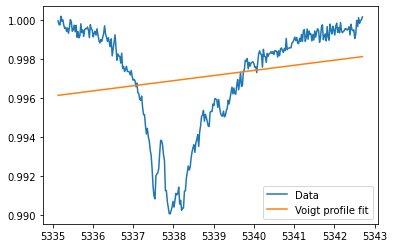

In [66]:
res1.params.pretty_print()
plt.plot(xForFit1, -(0 - yForFit1), label = 'Data')
plt.plot(xForFit1, -(0 - res1.best_fit), label = 'Voigt profile fit')
plt.legend()

In [29]:
arr1 = np.zeros(3)

In [30]:
arr1[1] = 3

In [31]:
print(arr1)

[0. 3. 0.]


In [36]:
arr2 = copy.deepcopy(arr1.reshape(3))

In [37]:
print(arr2)

[0. 4. 0.]


In [38]:
arr2[1] = 5

In [39]:
print(arr1)
print(arr2)

[0. 4. 0.]
[0. 5. 0.]


In [40]:
arr3 = np.zeros(1)

In [45]:
arr4 = np.broadcast_to(arr3, 3)

In [46]:
print(arr4)

[0. 0. 0.]


In [47]:
arr4[1] = 10

ValueError: assignment destination is read-only

In [48]:
arr5 = np.broadcast_to(arr1, 3)

In [51]:
arr5

array([0., 4., 0.])

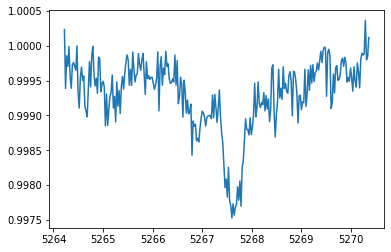

In [68]:
fig1, ax1 = plt.subplots()
ax1.plot(peak1data[:, 0], peak1data[:, 1])